In [1]:
import json
import spacy
import pandas as pd
import numpy as np


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# IMPORTATION ET PREPROCESSING DE LA BASE DE DONNEES

In [2]:
# 1) Charger un fichier JSON (lecture)
data = pd.read_json("../data/ensai_2025_req_favoriser_sport.json", encoding="utf‑8")

In [3]:
data.head()

,total,results,seed
0,1540,"{'id': '82d5eb8f-f953-4e16-9015-9b775ff5f292',...",NaN
1,1540,"{'id': '59ff8102-587a-425e-9976-c4d5d6a268fe',...",NaN
2,1540,"{'id': '66b19692-f947-44c9-9126-33863021098e',...",NaN
3,1540,"{'id': '97c4c337-15d4-4c6e-a108-aefcedeb1666',...",NaN
4,1540,"{'id': '9f71ce59-200c-450a-8987-399eee4fb1dd',...",NaN


In [4]:
data.describe()

,total,seed
count,1540.0,0.0
mean,1540.0,NaN
std,0.0,NaN
min,1540.0,NaN
25%,1540.0,NaN
50%,1540.0,NaN
75%,1540.0,NaN
max,1540.0,NaN


In [5]:
print(data.columns)

Index(['total', 'results', 'seed'], dtype='object')


In [6]:
dic = data.iloc[1,1]

In [7]:
dic.keys()

dict_keys(['id', 'content', 'contentLanguage', 'translatedContent', 'translatedLanguage', 'slug', 'status', 'createdAt', 'updatedAt', 'votes', 'context', 'author', 'organisations', 'tags', 'selectedStakeTag', 'myProposal', 'idea', 'question', 'operationId', 'proposalKey', 'keywords'])

In [8]:
df = data["results"].apply(pd.Series)

In [9]:
df.head()

,id,content,contentLanguage,translatedContent,translatedLanguage,slug,status,createdAt,updatedAt,votes,...,author,organisations,tags,selectedStakeTag,myProposal,idea,question,operationId,proposalKey,keywords
0,82d5eb8f-f953-4e16-9015-9b775ff5f292,Il faut inciter les Français à s'équiper de mo...,fr,None,None,il-faut-inciter-les-francais-a-s-equiper-de-mo...,Accepted,2024-04-01T07:07:29.747Z,2024-04-04T13:48:06.671Z,"[{'voteKey': 'agree', 'count': 0, 'score': 0.0...",...,{'userId': '4fad3035-1a13-4ed5-b81a-e1f400e7c6...,[],[],None,False,None,{'questionId': '9ccd072f-80e3-45dc-88cb-7b2428...,31297186-cb6d-4b0f-8bf5-0966afad5c97,7c09df8394050ca9d4d51299848e4d415e262904b64d5a...,[]
1,59ff8102-587a-425e-9976-c4d5d6a268fe,Il faut demander aux sportifs de haut niveau d...,fr,None,None,il-faut-demander-aux-sportifs-de-haut-niveau-d...,Accepted,2024-03-25T17:30:50.114Z,2024-03-27T11:55:43.793Z,"[{'voteKey': 'agree', 'count': 39, 'score': 0....",...,{'userId': 'e1606f3c-5d45-4a0e-b2da-7455125ca2...,[],[],None,False,None,{'questionId': '9ccd072f-80e3-45dc-88cb-7b2428...,31297186-cb6d-4b0f-8bf5-0966afad5c97,55346575f9c9043695e8a51987848cc5ed0ba6e769af81...,[]
2,66b19692-f947-44c9-9126-33863021098e,Il faut piétonniser des rues ou routes ou boul...,fr,None,None,il-faut-pietonniser-des-rues-ou-routes-ou-boul...,Accepted,2024-03-24T10:05:38.434Z,2024-03-27T11:49:34.740Z,"[{'voteKey': 'agree', 'count': 47, 'score': 0....",...,{'userId': 'b3589dd5-a215-481a-983c-0e4dff1e07...,[],[],None,False,None,{'questionId': '9ccd072f-80e3-45dc-88cb-7b2428...,31297186-cb6d-4b0f-8bf5-0966afad5c97,74af4270834811e803846bc54b259696397d2c6834211e...,[]
3,97c4c337-15d4-4c6e-a108-aefcedeb1666,Il faut organiser des compétitions inter-entre...,fr,None,None,il-faut-organiser-des-competitions-inter-entre...,Accepted,2024-01-29T10:13:07.672Z,2024-04-09T09:18:23.844Z,"[{'voteKey': 'agree', 'count': 210, 'score': 0...",...,{'userId': '22448ef2-cae9-42b5-9663-3bcd333fa2...,[],[{'tagId': '61c27abb-cdbe-404d-96aa-5cbb7dbc7c...,{'tagId': 'd2398cb5-3271-4e40-b28c-fcefbf08c5d...,False,None,{'questionId': '9ccd072f-80e3-45dc-88cb-7b2428...,31297186-cb6d-4b0f-8bf5-0966afad5c97,60feedad89a1827a6b6084a881a24e192d0db95342eba5...,[]
4,9f71ce59-200c-450a-8987-399eee4fb1dd,Il faut éduquer dès le plus jeune âge les enfa...,fr,None,None,il-faut-eduquer-des-le-plus-jeune-age-les-enfa...,Accepted,2024-03-28T08:51:45.459Z,2024-03-29T15:25:37.970Z,"[{'voteKey': 'agree', 'count': 69, 'score': 0....",...,{'userId': 'cbc394ac-1fe0-48e0-ac3f-8b463ed719...,[],[],None,False,None,{'questionId': '9ccd072f-80e3-45dc-88cb-7b2428...,31297186-cb6d-4b0f-8bf5-0966afad5c97,504c8ce83f1578631555421219a7067649a12dba3d3af2...,[]


In [10]:
dic

{'id': '59ff8102-587a-425e-9976-c4d5d6a268fe',
 'content': "Il faut demander aux sportifs de haut niveau d'expliquer au public en quoi l'exercice physique peut s'avérer essentiel dans la vie.",
 'contentLanguage': 'fr',
 'translatedContent': None,
 'translatedLanguage': None,
 'slug': 'il-faut-demander-aux-sportifs-de-haut-niveau-d-expliquer-au-public-en-quoi-l-exercice-physique-peut-s-averer-essentiel-dans-la-vie',
 'status': 'Accepted',
 'createdAt': '2024-03-25T17:30:50.114Z',
 'updatedAt': '2024-03-27T11:55:43.793Z',
 'votes': [{'voteKey': 'agree',
   'count': 39,
   'score': 0.45,
   'qualifications': [{'qualificationKey': 'likeIt',
     'count': 6,
     'hasQualified': False},
    {'qualificationKey': 'platitudeAgree', 'count': 6, 'hasQualified': False},
    {'qualificationKey': 'doable', 'count': 14, 'hasQualified': False}],
   'hasVoted': False},
  {'voteKey': 'neutral',
   'count': 29,
   'score': 0.34,
   'qualifications': [{'qualificationKey': 'noOpinion',
     'count': 14,


In [11]:
df["keywords"].value_counts()

keywords
[]                                                                                                                                                                                   765
[{'key': 'sport', 'label': 'Sport'}]                                                                                                                                                 507
[{'key': 'activité', 'label': 'Activités'}]                                                                                                                                           96
[{'key': 'activité physique', 'label': 'Activités physiques'}, {'key': 'activité', 'label': 'Activités'}]                                                                             75
[{'key': 'sport', 'label': 'Sport'}, {'key': 'santé', 'label': 'Santé'}]                                                                                                              29
[{'key': 'santé', 'label': 'Santé'}]                              

In [12]:
col = ["id", "content", "slug", "createdAt", "updatedAt", "votes", "author"]

In [13]:
df = df[col].copy()

In [14]:
df.head()

,id,content,slug,createdAt,updatedAt,votes,author
0,82d5eb8f-f953-4e16-9015-9b775ff5f292,Il faut inciter les Français à s'équiper de mo...,il-faut-inciter-les-francais-a-s-equiper-de-mo...,2024-04-01T07:07:29.747Z,2024-04-04T13:48:06.671Z,"[{'voteKey': 'agree', 'count': 0, 'score': 0.0...",{'userId': '4fad3035-1a13-4ed5-b81a-e1f400e7c6...
1,59ff8102-587a-425e-9976-c4d5d6a268fe,Il faut demander aux sportifs de haut niveau d...,il-faut-demander-aux-sportifs-de-haut-niveau-d...,2024-03-25T17:30:50.114Z,2024-03-27T11:55:43.793Z,"[{'voteKey': 'agree', 'count': 39, 'score': 0....",{'userId': 'e1606f3c-5d45-4a0e-b2da-7455125ca2...
2,66b19692-f947-44c9-9126-33863021098e,Il faut piétonniser des rues ou routes ou boul...,il-faut-pietonniser-des-rues-ou-routes-ou-boul...,2024-03-24T10:05:38.434Z,2024-03-27T11:49:34.740Z,"[{'voteKey': 'agree', 'count': 47, 'score': 0....",{'userId': 'b3589dd5-a215-481a-983c-0e4dff1e07...
3,97c4c337-15d4-4c6e-a108-aefcedeb1666,Il faut organiser des compétitions inter-entre...,il-faut-organiser-des-competitions-inter-entre...,2024-01-29T10:13:07.672Z,2024-04-09T09:18:23.844Z,"[{'voteKey': 'agree', 'count': 210, 'score': 0...",{'userId': '22448ef2-cae9-42b5-9663-3bcd333fa2...
4,9f71ce59-200c-450a-8987-399eee4fb1dd,Il faut éduquer dès le plus jeune âge les enfa...,il-faut-eduquer-des-le-plus-jeune-age-les-enfa...,2024-03-28T08:51:45.459Z,2024-03-29T15:25:37.970Z,"[{'voteKey': 'agree', 'count': 69, 'score': 0....",{'userId': 'cbc394ac-1fe0-48e0-ac3f-8b463ed719...


In [15]:
def votes(raw) :
    liste = []
    for r in raw :
        r_count = r["count"]
        qualif_r = [c["count"] for c in r["qualifications"]]
        liste.append((r_count,(qualif_r)))
    return liste

    

In [16]:
df["vote_ajusted"]=df['votes'].apply(votes)

In [17]:
df["vote_agree"] = df["vote_ajusted"].str[0]
df["vote_neutral"] = df["vote_ajusted"].str[1]
df["vote_disagree"] = df["vote_ajusted"].str[2]

In [18]:
df.head()

,id,content,slug,createdAt,updatedAt,votes,author,vote_ajusted,vote_agree,vote_neutral,vote_disagree
0,82d5eb8f-f953-4e16-9015-9b775ff5f292,Il faut inciter les Français à s'équiper de mo...,il-faut-inciter-les-francais-a-s-equiper-de-mo...,2024-04-01T07:07:29.747Z,2024-04-04T13:48:06.671Z,"[{'voteKey': 'agree', 'count': 0, 'score': 0.0...",{'userId': '4fad3035-1a13-4ed5-b81a-e1f400e7c6...,"[(0, [0, 0, 0]), (6, [1, 0, 3]), (10, [1, 5, 3])]","(0, [0, 0, 0])","(6, [1, 0, 3])","(10, [1, 5, 3])"
1,59ff8102-587a-425e-9976-c4d5d6a268fe,Il faut demander aux sportifs de haut niveau d...,il-faut-demander-aux-sportifs-de-haut-niveau-d...,2024-03-25T17:30:50.114Z,2024-03-27T11:55:43.793Z,"[{'voteKey': 'agree', 'count': 39, 'score': 0....",{'userId': 'e1606f3c-5d45-4a0e-b2da-7455125ca2...,"[(39, [6, 6, 14]), (29, [14, 0, 9]), (19, [2, ...","(39, [6, 6, 14])","(29, [14, 0, 9])","(19, [2, 5, 7])"
2,66b19692-f947-44c9-9126-33863021098e,Il faut piétonniser des rues ou routes ou boul...,il-faut-pietonniser-des-rues-ou-routes-ou-boul...,2024-03-24T10:05:38.434Z,2024-03-27T11:49:34.740Z,"[{'voteKey': 'agree', 'count': 47, 'score': 0....",{'userId': 'b3589dd5-a215-481a-983c-0e4dff1e07...,"[(47, [13, 4, 16]), (18, [7, 2, 3]), (18, [2, ...","(47, [13, 4, 16])","(18, [7, 2, 3])","(18, [2, 8, 3])"
3,97c4c337-15d4-4c6e-a108-aefcedeb1666,Il faut organiser des compétitions inter-entre...,il-faut-organiser-des-competitions-inter-entre...,2024-01-29T10:13:07.672Z,2024-04-09T09:18:23.844Z,"[{'voteKey': 'agree', 'count': 210, 'score': 0...",{'userId': '22448ef2-cae9-42b5-9663-3bcd333fa2...,"[(210, [38, 21, 60]), (155, [48, 4, 52]), (205...","(210, [38, 21, 60])","(155, [48, 4, 52])","(205, [41, 57, 62])"
4,9f71ce59-200c-450a-8987-399eee4fb1dd,Il faut éduquer dès le plus jeune âge les enfa...,il-faut-eduquer-des-le-plus-jeune-age-les-enfa...,2024-03-28T08:51:45.459Z,2024-03-29T15:25:37.970Z,"[{'voteKey': 'agree', 'count': 69, 'score': 0....",{'userId': 'cbc394ac-1fe0-48e0-ac3f-8b463ed719...,"[(69, [14, 6, 24]), (13, [2, 6, 3]), (4, [0, 1...","(69, [14, 6, 24])","(13, [2, 6, 3])","(4, [0, 1, 3])"


In [19]:
dic['votes']


[{'voteKey': 'agree',
  'count': 39,
  'score': 0.45,
  'qualifications': [{'qualificationKey': 'likeIt',
    'count': 6,
    'hasQualified': False},
   {'qualificationKey': 'platitudeAgree', 'count': 6, 'hasQualified': False},
   {'qualificationKey': 'doable', 'count': 14, 'hasQualified': False}],
  'hasVoted': False},
 {'voteKey': 'neutral',
  'count': 29,
  'score': 0.34,
  'qualifications': [{'qualificationKey': 'noOpinion',
    'count': 14,
    'hasQualified': False},
   {'qualificationKey': 'doNotUnderstand', 'count': 0, 'hasQualified': False},
   {'qualificationKey': 'doNotCare', 'count': 9, 'hasQualified': False}],
  'hasVoted': False},
 {'voteKey': 'disagree',
  'count': 19,
  'score': 0.21,
  'qualifications': [{'qualificationKey': 'impossible',
    'count': 2,
    'hasQualified': False},
   {'qualificationKey': 'noWay', 'count': 5, 'hasQualified': False},
   {'qualificationKey': 'platitudeDisagree',
    'count': 7,
    'hasQualified': False}],
  'hasVoted': False}]

In [20]:
df = df.drop(columns=["votes", "vote_ajusted"])

In [21]:
df

,id,content,slug,createdAt,updatedAt,author,vote_agree,vote_neutral,vote_disagree
0,82d5eb8f-f953-4e16-9015-9b775ff5f292,Il faut inciter les Français à s'équiper de mo...,il-faut-inciter-les-francais-a-s-equiper-de-mo...,2024-04-01T07:07:29.747Z,2024-04-04T13:48:06.671Z,{'userId': '4fad3035-1a13-4ed5-b81a-e1f400e7c6...,"(0, [0, 0, 0])","(6, [1, 0, 3])","(10, [1, 5, 3])"
1,59ff8102-587a-425e-9976-c4d5d6a268fe,Il faut demander aux sportifs de haut niveau d...,il-faut-demander-aux-sportifs-de-haut-niveau-d...,2024-03-25T17:30:50.114Z,2024-03-27T11:55:43.793Z,{'userId': 'e1606f3c-5d45-4a0e-b2da-7455125ca2...,"(39, [6, 6, 14])","(29, [14, 0, 9])","(19, [2, 5, 7])"
2,66b19692-f947-44c9-9126-33863021098e,Il faut piétonniser des rues ou routes ou boul...,il-faut-pietonniser-des-rues-ou-routes-ou-boul...,2024-03-24T10:05:38.434Z,2024-03-27T11:49:34.740Z,{'userId': 'b3589dd5-a215-481a-983c-0e4dff1e07...,"(47, [13, 4, 16])","(18, [7, 2, 3])","(18, [2, 8, 3])"
3,97c4c337-15d4-4c6e-a108-aefcedeb1666,Il faut organiser des compétitions inter-entre...,il-faut-organiser-des-competitions-inter-entre...,2024-01-29T10:13:07.672Z,2024-04-09T09:18:23.844Z,{'userId': '22448ef2-cae9-42b5-9663-3bcd333fa2...,"(210, [38, 21, 60])","(155, [48, 4, 52])","(205, [41, 57, 62])"
4,9f71ce59-200c-450a-8987-399eee4fb1dd,Il faut éduquer dès le plus jeune âge les enfa...,il-faut-eduquer-des-le-plus-jeune-age-les-enfa...,2024-03-28T08:51:45.459Z,2024-03-29T15:25:37.970Z,{'userId': 'cbc394ac-1fe0-48e0-ac3f-8b463ed719...,"(69, [14, 6, 24])","(13, [2, 6, 3])","(4, [0, 1, 3])"
...,...,...,...,...,...,...,...,...,...
1535,16251ada-5ac5-488f-84d9-8a3a4d74c74c,Il faut qu'il y ait plus d'offres d'activités ...,il-faut-qu-il-y-ait-plus-d-offres-d-activites-...,2024-04-01T07:57:23.506Z,2024-04-11T12:47:39.853Z,{'userId': '6f660e94-cf68-4ca3-b431-0e21da54ec...,"(28, [8, 1, 8])","(3, [0, 1, 0])","(2, [0, 2, 0])"
1536,029568f5-4352-4667-b666-65a2da5565c9,Il faut faire des aménagements cyclables ainsi...,il-faut-faire-des-amenagements-cyclables-ainsi...,2024-03-30T11:59:17.932Z,2024-04-11T12:47:39.749Z,{'userId': 'd9822c10-8d91-4d56-905d-95c91234ba...,"(33, [5, 3, 12])","(9, [3, 2, 3])","(3, [0, 2, 0])"
1537,c244a312-43b0-492a-a4c3-61acb664784d,Il faut inciter à avoir des douches dans les e...,il-faut-inciter-a-avoir-des-douches-dans-les-e...,2024-03-31T07:42:57.843Z,2024-04-04T13:41:00.414Z,{'userId': '678b91c1-2f43-4336-a000-522e8fa2e4...,"(33, [7, 4, 9])","(9, [3, 2, 1])","(3, [2, 0, 0])"
1538,83738cba-e965-4eeb-873e-6e576c83118f,Il faut adapter les vestiaires des enfants à l...,il-faut-adapter-les-vestiaires-des-enfants-a-l...,2024-03-28T15:32:31.427Z,2024-04-05T09:00:40.920Z,{'userId': '3cd92c36-df5b-4392-b529-525acea3b7...,"(30, [7, 4, 6])","(11, [3, 2, 3])","(4, [2, 1, 1])"


In [22]:
df.loc[200,"author"]

{'userId': 'd768571b-64f9-4251-86fc-3b7e91572b1a',
 'firstName': 'Celine',
 'displayName': 'Celine',
 'organisationName': None,
 'organisationSlug': None,
 'postalCode': '33000',
 'age': 43,
 'avatarUrl': None,
 'userType': 'USER'}

In [23]:
df["author_id"] = df["author"].apply(lambda raw: raw["userId"])
df["author_age"] = df["author"].apply(lambda raw: raw["age"])
df["author_type"] = df["author"].apply(lambda raw: raw["userType"])

In [24]:
df.head()

,id,content,slug,createdAt,updatedAt,author,vote_agree,vote_neutral,vote_disagree,author_id,author_age,author_type
0,82d5eb8f-f953-4e16-9015-9b775ff5f292,Il faut inciter les Français à s'équiper de mo...,il-faut-inciter-les-francais-a-s-equiper-de-mo...,2024-04-01T07:07:29.747Z,2024-04-04T13:48:06.671Z,{'userId': '4fad3035-1a13-4ed5-b81a-e1f400e7c6...,"(0, [0, 0, 0])","(6, [1, 0, 3])","(10, [1, 5, 3])",4fad3035-1a13-4ed5-b81a-e1f400e7c665,61.0,USER
1,59ff8102-587a-425e-9976-c4d5d6a268fe,Il faut demander aux sportifs de haut niveau d...,il-faut-demander-aux-sportifs-de-haut-niveau-d...,2024-03-25T17:30:50.114Z,2024-03-27T11:55:43.793Z,{'userId': 'e1606f3c-5d45-4a0e-b2da-7455125ca2...,"(39, [6, 6, 14])","(29, [14, 0, 9])","(19, [2, 5, 7])",e1606f3c-5d45-4a0e-b2da-7455125ca204,NaN,USER
2,66b19692-f947-44c9-9126-33863021098e,Il faut piétonniser des rues ou routes ou boul...,il-faut-pietonniser-des-rues-ou-routes-ou-boul...,2024-03-24T10:05:38.434Z,2024-03-27T11:49:34.740Z,{'userId': 'b3589dd5-a215-481a-983c-0e4dff1e07...,"(47, [13, 4, 16])","(18, [7, 2, 3])","(18, [2, 8, 3])",b3589dd5-a215-481a-983c-0e4dff1e0763,66.0,USER
3,97c4c337-15d4-4c6e-a108-aefcedeb1666,Il faut organiser des compétitions inter-entre...,il-faut-organiser-des-competitions-inter-entre...,2024-01-29T10:13:07.672Z,2024-04-09T09:18:23.844Z,{'userId': '22448ef2-cae9-42b5-9663-3bcd333fa2...,"(210, [38, 21, 60])","(155, [48, 4, 52])","(205, [41, 57, 62])",22448ef2-cae9-42b5-9663-3bcd333fa231,20.0,USER
4,9f71ce59-200c-450a-8987-399eee4fb1dd,Il faut éduquer dès le plus jeune âge les enfa...,il-faut-eduquer-des-le-plus-jeune-age-les-enfa...,2024-03-28T08:51:45.459Z,2024-03-29T15:25:37.970Z,{'userId': 'cbc394ac-1fe0-48e0-ac3f-8b463ed719...,"(69, [14, 6, 24])","(13, [2, 6, 3])","(4, [0, 1, 3])",cbc394ac-1fe0-48e0-ac3f-8b463ed71967,NaN,USER


In [25]:
df["author_type"].value_counts()

author_type
USER            1469
ORGANISATION      71
Name: count, dtype: int64

In [26]:
df = df.drop(columns="author")

In [27]:
df.head()

,id,content,slug,createdAt,updatedAt,vote_agree,vote_neutral,vote_disagree,author_id,author_age,author_type
0,82d5eb8f-f953-4e16-9015-9b775ff5f292,Il faut inciter les Français à s'équiper de mo...,il-faut-inciter-les-francais-a-s-equiper-de-mo...,2024-04-01T07:07:29.747Z,2024-04-04T13:48:06.671Z,"(0, [0, 0, 0])","(6, [1, 0, 3])","(10, [1, 5, 3])",4fad3035-1a13-4ed5-b81a-e1f400e7c665,61.0,USER
1,59ff8102-587a-425e-9976-c4d5d6a268fe,Il faut demander aux sportifs de haut niveau d...,il-faut-demander-aux-sportifs-de-haut-niveau-d...,2024-03-25T17:30:50.114Z,2024-03-27T11:55:43.793Z,"(39, [6, 6, 14])","(29, [14, 0, 9])","(19, [2, 5, 7])",e1606f3c-5d45-4a0e-b2da-7455125ca204,NaN,USER
2,66b19692-f947-44c9-9126-33863021098e,Il faut piétonniser des rues ou routes ou boul...,il-faut-pietonniser-des-rues-ou-routes-ou-boul...,2024-03-24T10:05:38.434Z,2024-03-27T11:49:34.740Z,"(47, [13, 4, 16])","(18, [7, 2, 3])","(18, [2, 8, 3])",b3589dd5-a215-481a-983c-0e4dff1e0763,66.0,USER
3,97c4c337-15d4-4c6e-a108-aefcedeb1666,Il faut organiser des compétitions inter-entre...,il-faut-organiser-des-competitions-inter-entre...,2024-01-29T10:13:07.672Z,2024-04-09T09:18:23.844Z,"(210, [38, 21, 60])","(155, [48, 4, 52])","(205, [41, 57, 62])",22448ef2-cae9-42b5-9663-3bcd333fa231,20.0,USER
4,9f71ce59-200c-450a-8987-399eee4fb1dd,Il faut éduquer dès le plus jeune âge les enfa...,il-faut-eduquer-des-le-plus-jeune-age-les-enfa...,2024-03-28T08:51:45.459Z,2024-03-29T15:25:37.970Z,"(69, [14, 6, 24])","(13, [2, 6, 3])","(4, [0, 1, 3])",cbc394ac-1fe0-48e0-ac3f-8b463ed71967,NaN,USER


In [28]:
df.isna().sum()

id                 0
content            0
slug               0
createdAt          0
updatedAt          0
vote_agree         0
vote_neutral       0
vote_disagree      0
author_id          0
author_age       317
author_type        0
dtype: int64

In [29]:
df["author_age"].fillna(df["author_age"].median(), inplace=True)

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_9784\565535580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["author_age"].fillna(df["author_age"].median(), inplace=True)


In [30]:
df.isna().sum()

id               0
content          0
slug             0
createdAt        0
updatedAt        0
vote_agree       0
vote_neutral     0
vote_disagree    0
author_id        0
author_age       0
author_type      0
dtype: int64

In [31]:
agree=['likeit', 'platitudeagree','doable']
Neutral=["noOpinion", "doNotUnderstand", "doNotCare"]
desagree=["impossible", "noWay", "platitudeDisagree"]

votes_types = (agree, Neutral, desagree)
votes_names = ["agree", "neutral", "disagree" ]

In [32]:
def sub_votes(data) :
    i = 0
    for type in votes_types :
        j = 0
        for subtype in type :
            data[votes_names[i] + "_" + subtype] = data["vote_"+votes_names[i]].apply(lambda raw: raw[1][j])
            j+=1
        i+=1
    return data

In [33]:
df_f = sub_votes(df)

In [34]:
def n_votes(data) :
    i = 0
    for type in votes_types :
        data["vote_"+votes_names[i]] = data["vote_"+votes_names[i]].apply(lambda raw: raw[0])
        i+=1
    return data

In [35]:
df_f = n_votes(df_f)

In [36]:
df_f

,id,content,slug,createdAt,updatedAt,vote_agree,vote_neutral,vote_disagree,author_id,author_age,author_type,agree_likeit,agree_platitudeagree,agree_doable,neutral_noOpinion,neutral_doNotUnderstand,neutral_doNotCare,disagree_impossible,disagree_noWay,disagree_platitudeDisagree
0,82d5eb8f-f953-4e16-9015-9b775ff5f292,Il faut inciter les Français à s'équiper de mo...,il-faut-inciter-les-francais-a-s-equiper-de-mo...,2024-04-01T07:07:29.747Z,2024-04-04T13:48:06.671Z,0,6,10,4fad3035-1a13-4ed5-b81a-e1f400e7c665,61.0,USER,0,0,0,1,0,3,1,5,3
1,59ff8102-587a-425e-9976-c4d5d6a268fe,Il faut demander aux sportifs de haut niveau d...,il-faut-demander-aux-sportifs-de-haut-niveau-d...,2024-03-25T17:30:50.114Z,2024-03-27T11:55:43.793Z,39,29,19,e1606f3c-5d45-4a0e-b2da-7455125ca204,50.0,USER,6,6,14,14,0,9,2,5,7
2,66b19692-f947-44c9-9126-33863021098e,Il faut piétonniser des rues ou routes ou boul...,il-faut-pietonniser-des-rues-ou-routes-ou-boul...,2024-03-24T10:05:38.434Z,2024-03-27T11:49:34.740Z,47,18,18,b3589dd5-a215-481a-983c-0e4dff1e0763,66.0,USER,13,4,16,7,2,3,2,8,3
3,97c4c337-15d4-4c6e-a108-aefcedeb1666,Il faut organiser des compétitions inter-entre...,il-faut-organiser-des-competitions-inter-entre...,2024-01-29T10:13:07.672Z,2024-04-09T09:18:23.844Z,210,155,205,22448ef2-cae9-42b5-9663-3bcd333fa231,20.0,USER,38,21,60,48,4,52,41,57,62
4,9f71ce59-200c-450a-8987-399eee4fb1dd,Il faut éduquer dès le plus jeune âge les enfa...,il-faut-eduquer-des-le-plus-jeune-age-les-enfa...,2024-03-28T08:51:45.459Z,2024-03-29T15:25:37.970Z,69,13,4,cbc394ac-1fe0-48e0-ac3f-8b463ed71967,50.0,USER,14,6,24,2,6,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,16251ada-5ac5-488f-84d9-8a3a4d74c74c,Il faut qu'il y ait plus d'offres d'activités ...,il-faut-qu-il-y-ait-plus-d-offres-d-activites-...,2024-04-01T07:57:23.506Z,2024-04-11T12:47:39.853Z,28,3,2,6f660e94-cf68-4ca3-b431-0e21da54ec46,50.0,USER,8,1,8,0,1,0,0,2,0
1536,029568f5-4352-4667-b666-65a2da5565c9,Il faut faire des aménagements cyclables ainsi...,il-faut-faire-des-amenagements-cyclables-ainsi...,2024-03-30T11:59:17.932Z,2024-04-11T12:47:39.749Z,33,9,3,d9822c10-8d91-4d56-905d-95c91234ba61,68.0,USER,5,3,12,3,2,3,0,2,0
1537,c244a312-43b0-492a-a4c3-61acb664784d,Il faut inciter à avoir des douches dans les e...,il-faut-inciter-a-avoir-des-douches-dans-les-e...,2024-03-31T07:42:57.843Z,2024-04-04T13:41:00.414Z,33,9,3,678b91c1-2f43-4336-a000-522e8fa2e400,51.0,USER,7,4,9,3,2,1,2,0,0
1538,83738cba-e965-4eeb-873e-6e576c83118f,Il faut adapter les vestiaires des enfants à l...,il-faut-adapter-les-vestiaires-des-enfants-a-l...,2024-03-28T15:32:31.427Z,2024-04-05T09:00:40.920Z,30,11,4,3cd92c36-df5b-4392-b529-525acea3b72c,29.0,USER,7,4,6,3,2,3,2,1,1


In [37]:
df_f["author_id"].value_counts()

author_id
6f660e94-cf68-4ca3-b431-0e21da54ec46    21
946d70a5-b382-47ee-bf36-a13c75f8a7f8    19
c21e71f9-aff9-43dc-bea1-75e5aeca4c4f    17
10060f7b-5bc7-4e91-af11-2e796a9fc642    15
dc488b7b-23f0-4d69-b5ed-00ca74eb84b5    14
                                        ..
f754466e-e6f9-4104-9cd0-980c607f94de     1
1f583dd4-8027-4740-affe-ef3b447f8272     1
aec1d07f-a49d-4e22-9996-440710786486     1
e67078eb-beb8-477a-a39e-0e74acb621d7     1
678b91c1-2f43-4336-a000-522e8fa2e400     1
Name: count, Length: 969, dtype: int64

# Traitement des textes 

In [38]:
df = df_f.copy()

In [39]:
import spacy

In [40]:
!python -m spacy download fr_core_news_md


     ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
     ------- -------------------------------- 8.1/45.8 MB 35.9 MB/s eta 0:00:02
     -------------- ------------------------ 16.8/45.8 MB 39.1 MB/s eta 0:00:01
     --------------------- ----------------- 25.7/45.8 MB 39.7 MB/s eta 0:00:01
     ---------------------------- ---------- 33.6/45.8 MB 38.8 MB/s eta 0:00:01
     ----------------------------------- --- 41.2/45.8 MB 37.9 MB/s eta 0:00:01
     --------------------------------------  45.6/45.8 MB 38.2 MB/s eta 0:00:01
     --------------------------------------  45.6/45.8 MB 38.2 MB/s eta 0:00:01
     --------------------------------------  45.6/45.8 MB 38.2 MB/s eta 0:00:01
     --------------------------------------  45.6/45.8 MB 38.2 MB/s eta 0:00:01
     --------------------------------------  45.6/45.8 MB 38.2 MB/s eta 0:00:01
     --------------------------------------  45.6/45.8 MB 38.2 MB/s eta 0:00:01
     --------------------------------------  45.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# PREPOCESSING DES CORPUS 

In [41]:
import spacy
import pandas as pd
from unidecode import unidecode  # << IMPORT ici

# 1. Chargement du modèle spaCy
nlp = spacy.load('fr_core_news_md')

# 2. Fonction de prétraitement améliorée
def preprocess(text):
    text = unidecode(text.lower())  # Mise en minuscules + suppression des accents
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# 3. Application sur la colonne 'content'
df['tokens'] = df['content'].astype(str).apply(preprocess)

# Aperçu
print(df[['content', 'tokens']].head())


                                             content  \
0  Il faut inciter les Français à s'équiper de mo...   
1  Il faut demander aux sportifs de haut niveau d...   
2  Il faut piétonniser des rues ou routes ou boul...   
3  Il faut organiser des compétitions inter-entre...   
4  Il faut éduquer dès le plus jeune âge les enfa...   

                                              tokens  
0  [falloir, inciter, francai, equiper, montre, c...  
1  [falloir, demander, sportif, haut, niveau, exp...  
2  [falloir, pietonniser, rue, route, boulevard, ...  
3      [falloir, organiser, competition, mediatiser]  
4  [falloir, eduquer, jeune, age, enfant, exercic...  


In [42]:
# 2. Supprimer les mots les plus fréquents (stop words)
from collections import Counter

all_tokens = [token for tokens in df['tokens'] for token in tokens]
top_n = 20
most_common_words = set([w for w, _ in Counter(all_tokens).most_common(top_n)])

def remove_common(tokens):
    return [t for t in tokens if t not in most_common_words]

df['tokens'] = df['tokens'].apply(remove_common)

In [43]:
df[['content','tokens']].head()

,content,tokens
0,Il faut inciter les Français à s'équiper de mo...,"[inciter, francai, equiper, montre, connecteer..."
1,Il faut demander aux sportifs de haut niveau d...,"[demander, haut, niveau, expliquer, public, ex..."
2,Il faut piétonniser des rues ou routes ou boul...,"[pietonniser, rue, route, boulevard, inciter, ..."
3,Il faut organiser des compétitions inter-entre...,"[organiser, competition, mediatiser]"
4,Il faut éduquer dès le plus jeune âge les enfa...,"[eduquer, age, exercice, simple, disponible, a..."


# VECTORISATION AVEC WORD2VEC

In [44]:
from gensim.models import Word2Vec

In [45]:
from gensim.models import Word2Vec

In [46]:
MAX=np.max([len(l) for l in df["tokens"]])
MAX

13

## Vectorisation

In [47]:
# 1. Entraînement du modèle Word2Vec
model = Word2Vec(
    sentences=df['tokens'],   # On utilise directement la liste de tokens
    vector_size=50,          # Dimension des vecteurs (tu peux changer, ex: 50, 200)
    window=MAX,                 # Taille du contexte (nombre de mots autour)
    min_count=1,              # Ignore les mots apparaissant moins de 2 fois
    sg=0                      # 1 = skip-gram ; 0 = CBOW
)

# 2. Sauvegarder ou charger ton modèle si besoin
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")


In [48]:
 # 3. Obtenir les vecteurs pour chaque mot

In [49]:
def get_token_vector(tokens):
    list_vector = []
    for t in tokens :
        list_vector.append(model.wv[t])
    return list_vector


# application de la fonction sur la colonne 'tokens'
df['vectors'] = df['tokens'].apply(get_token_vector)      
df[['tokens', 'vectors']].head()

,tokens,vectors
0,"[inciter, francai, equiper, montre, connecteer...","[[0.014468676, -0.014729222, -0.0018956613, -0..."
1,"[demander, haut, niveau, expliquer, public, ex...","[[0.017099988, 0.010992155, 0.017856834, 0.003..."
2,"[pietonniser, rue, route, boulevard, inciter, ...","[[0.012482426, 0.017164085, -0.00494617, 0.019..."
3,"[organiser, competition, mediatiser]","[[0.010907331, -0.009554288, -0.0118495105, 2...."
4,"[eduquer, age, exercice, simple, disponible, a...","[[-0.005599727, 0.0120543465, -0.000413138, -0..."


## Visualisation du nuage de point par TSNE

In [50]:
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

# 1. Sélection des mots (ex : les 300 plus fréquents)
mots = list(model.wv.index_to_key[:300])
vecteurs = model.wv[mots]

# 2. Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
vecteurs_2D = tsne.fit_transform(vecteurs)

# 3. Mise en DataFrame pour Plotly
df_tsne = pd.DataFrame({
    "mot": mots,
    "x": vecteurs_2D[:, 0],
    "y": vecteurs_2D[:, 1]
})

# 4. Affichage interactif
fig = px.scatter(df_tsne, x="x", y="y", hover_name="mot", title="Visualisation interactive des embeddings (t-SNE)")
fig.update_traces(marker=dict(size=6, color="blue"), textposition='top center')
fig.update_layout(width=1000, height=700)
fig.show()


c:\Users\LENOVO PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [51]:
from utils import *

## Calcul de l'embedding moyen 

In [52]:
# Application de la fonction sur la colonne 'vectors' pour le calcul de la moyenne
df['doc_vector'] = df['vectors'].apply(lambda v: compute_mean_embedding(v, vector_size=50))

# CLUSTERING AVEC KMEANS

## Clustering

In [53]:
# Supposons que tu as une colonne `doc_vector` (vecteurs moyens de chaque document)
X = stack(df['doc_vector'].values)

# Application du clustering
kmeans_model, df['cluster'] = apply_kmeans_clustering(X, k=5, save_path="kmeans_model.joblib")


In [54]:
df[['doc_vector','cluster']].head()

,doc_vector,cluster
0,"[0.00013418114, -0.0014326266, -0.0045993463, ...",1
1,"[-0.0028629052, -0.002931041, 0.0024520631, -0...",1
2,"[-0.0023490705, -0.0011379829, -2.5414047e-06,...",2
3,"[-0.0048947404, -0.013401367, -0.004077067, 0....",4
4,"[-0.00012725356, 0.0015221629, -0.0063089686, ...",1


In [55]:
from numpy import stack

X = stack(df['doc_vector'].values)  # Matrice des vecteurs
visualize_clusters_2d(X, df['cluster'], method='tsne')


## Représentation des 5 tokens les plus utilisés par cluster

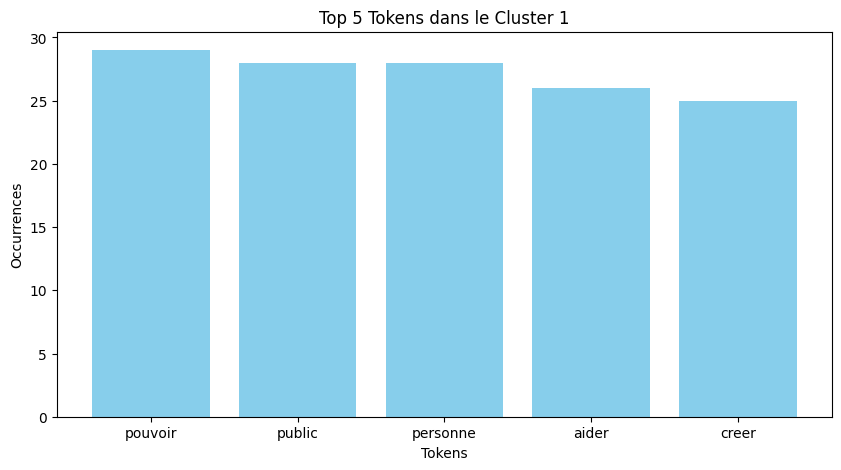

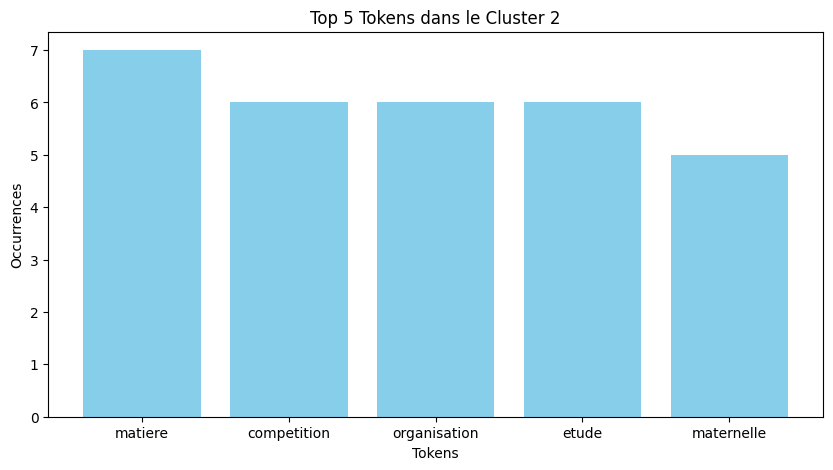

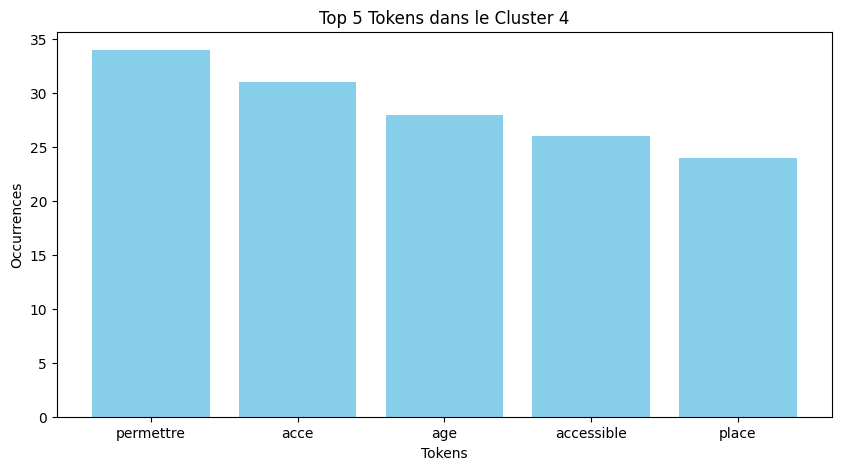

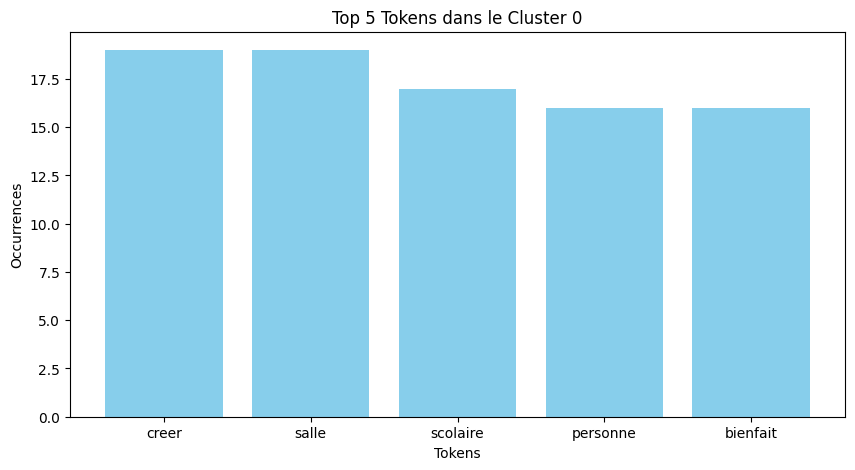

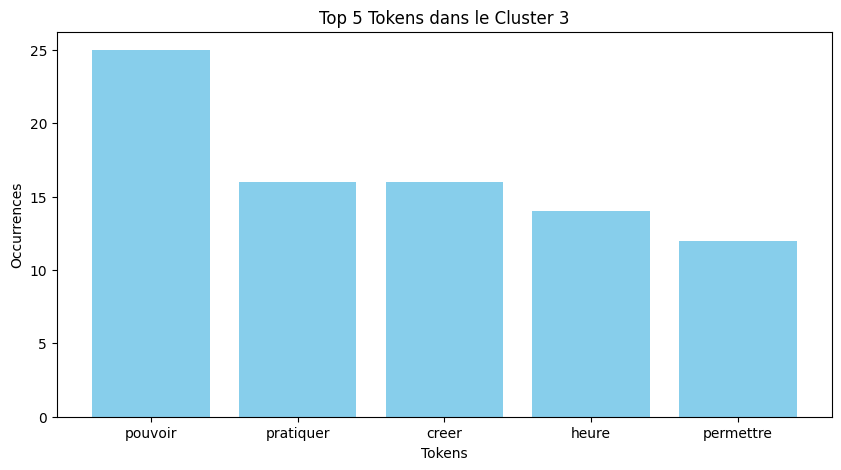

In [60]:
from collections import Counter

# Calculer la fréquence des tokens par cluster
top_tokens_by_cluster = {}

for cluster in df['cluster'].unique():
    # Sélectionner les tokens de chaque cluster
    cluster_tokens = df[df['cluster'] == cluster]['tokens'].sum()
    
    # Compter les occurrences de chaque token
    token_counts = Counter(cluster_tokens)
    
    # Obtenir les 5 tokens les plus fréquents
    top_tokens = token_counts.most_common(5)
    top_tokens_by_cluster[cluster] = top_tokens

# Visualiser les 5 tokens les plus fréquents par cluster
for cluster, tokens in top_tokens_by_cluster.items():
    tokens_list, counts = zip(*tokens)
    
    plt.figure(figsize=(10, 5))
    plt.bar(tokens_list, counts, color='skyblue')
    plt.title(f'Top 5 Tokens dans le Cluster {cluster}')
    plt.xlabel('Tokens')
    plt.ylabel('Occurrences')
    plt.show()


In [61]:
top_tokens_by_cluster

{1: [('pouvoir', 29),
  ('public', 28),
  ('personne', 28),
  ('aider', 26),
  ('creer', 25)],
 2: [('matiere', 7),
  ('competition', 6),
  ('organisation', 6),
  ('etude', 6),
  ('maternelle', 5)],
 4: [('permettre', 34),
  ('acce', 31),
  ('age', 28),
  ('accessible', 26),
  ('place', 24)],
 0: [('creer', 19),
  ('salle', 19),
  ('scolaire', 17),
  ('personne', 16),
  ('bienfait', 16)],
 3: [('pouvoir', 25),
  ('pratiquer', 16),
  ('creer', 16),
  ('heure', 14),
  ('permettre', 12)]}

In [63]:
## Définition de la thématique de chaque cluster
def get_cluster_theme(cluster_id):
    themes = {
        0: "Thème 1 : Création de nouvelles infrastructures sportives",
        1: "Thème 2 : Soutien public et accompagnement des personnes",
        2: "Thème 3 : Sport et éducation",
        3: "Thème 4 : Manque de temps pour pratiquer le sport",
        4: "Thème 5 : Accessibilité aux installations sportives"
    }
    return themes.get(cluster_id, "Thème inconnu")

In [64]:
## Utulisation de la fonction afin de correspondre chaque cluster à un thème
df['cluster_theme'] = df['cluster'].apply(get_cluster_theme)

In [65]:
df['cluster_theme'].head()

0    Thème 2 : Soutien public et accompagnement des...
1    Thème 2 : Soutien public et accompagnement des...
2                         Thème 3 : Sport et éducation
3    Thème 5 : Accessibilité aux installations spor...
4    Thème 2 : Soutien public et accompagnement des...
Name: cluster_theme, dtype: object

 # PROFILING DE CHAQUE CLUSTER

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1540 non-null   object 
 1   content                     1540 non-null   object 
 2   slug                        1540 non-null   object 
 3   createdAt                   1540 non-null   object 
 4   updatedAt                   1540 non-null   object 
 5   vote_agree                  1540 non-null   int64  
 6   vote_neutral                1540 non-null   int64  
 7   vote_disagree               1540 non-null   int64  
 8   author_id                   1540 non-null   object 
 9   author_age                  1540 non-null   float64
 10  author_type                 1540 non-null   object 
 11  agree_likeit                1540 non-null   int64  
 12  agree_platitudeagree        1540 non-null   int64  
 13  agree_doable                1540 

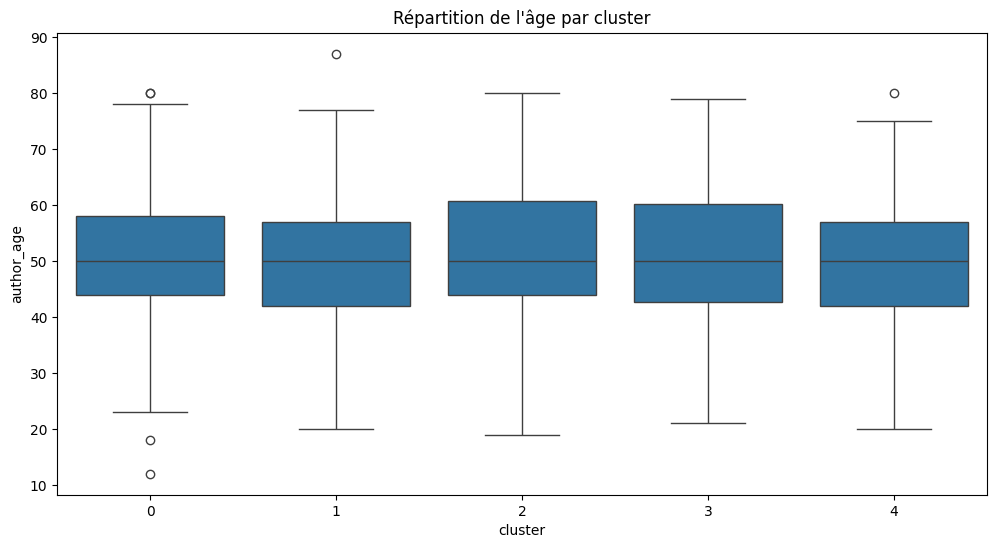

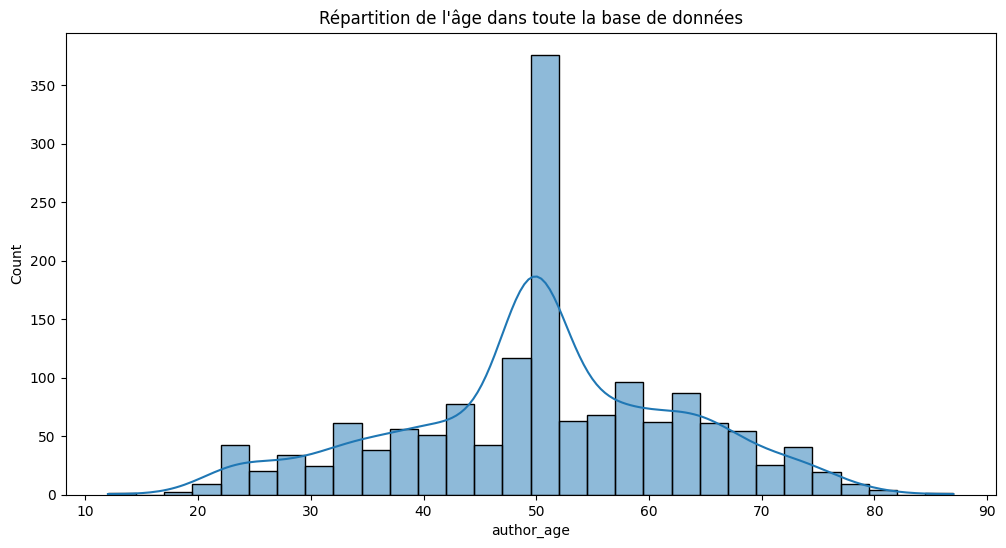

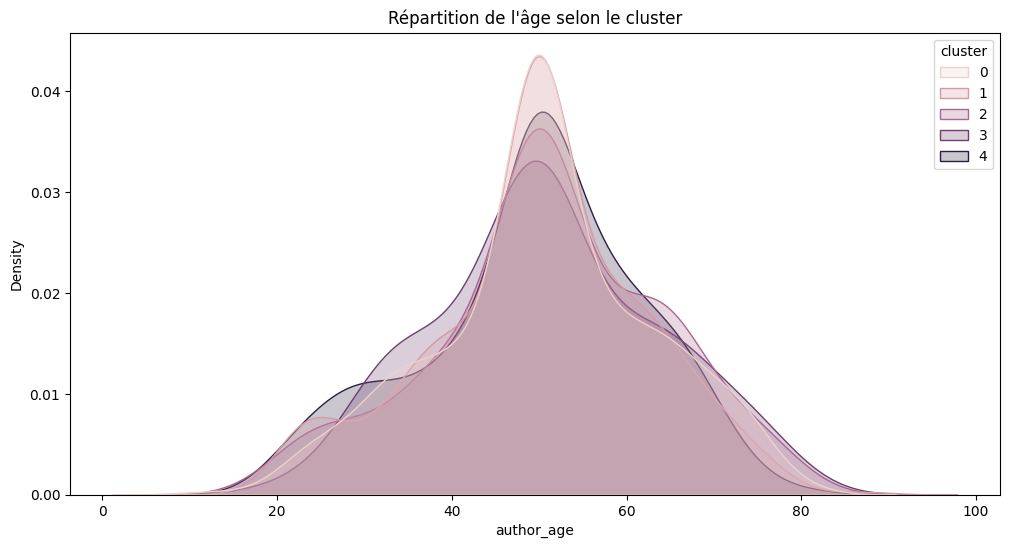

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier l'existence de la colonne 'author_age' dans df
if 'author_age' in df.columns:
    # 1. Répartition de l'âge par cluster
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='cluster', y='author_age', data=df)
    plt.title("Répartition de l'âge par cluster")
    plt.show()
    
    # 2. Répartition globale de l'âge (toute la base de données)
    plt.figure(figsize=(12, 6))
    sns.histplot(df['author_age'], bins=30, kde=True)
    plt.title("Répartition de l'âge dans toute la base de données")
    plt.show()
    
    # 3. Répartition de l'âge selon le cluster (graphique de densité)
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=df, x="author_age", hue="cluster", common_norm=False, fill=True)
    plt.title("Répartition de l'âge selon le cluster")
    plt.show()
else:
    print("La colonne 'author_age' n'existe pas dans le DataFrame.")


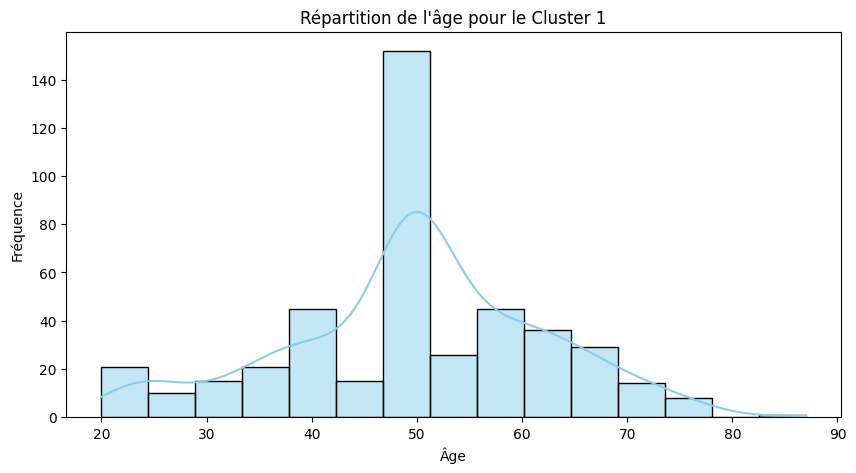

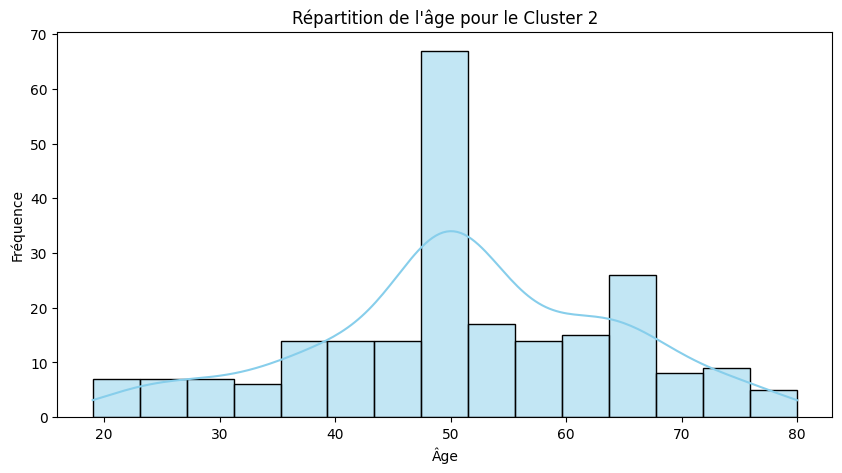

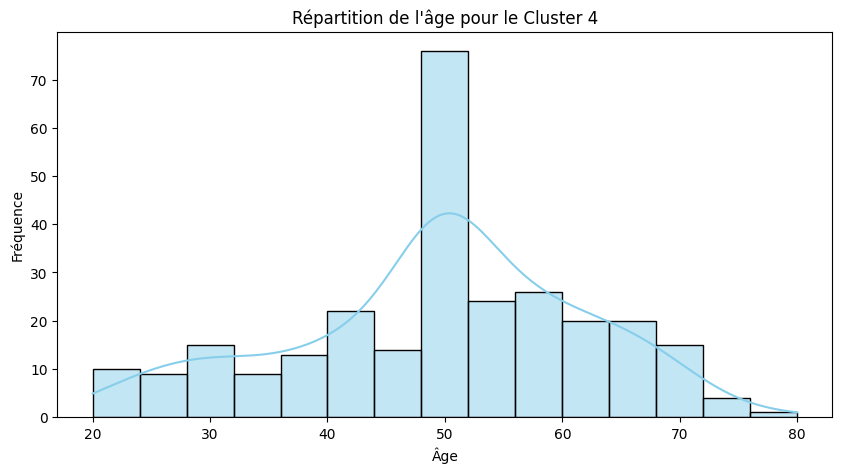

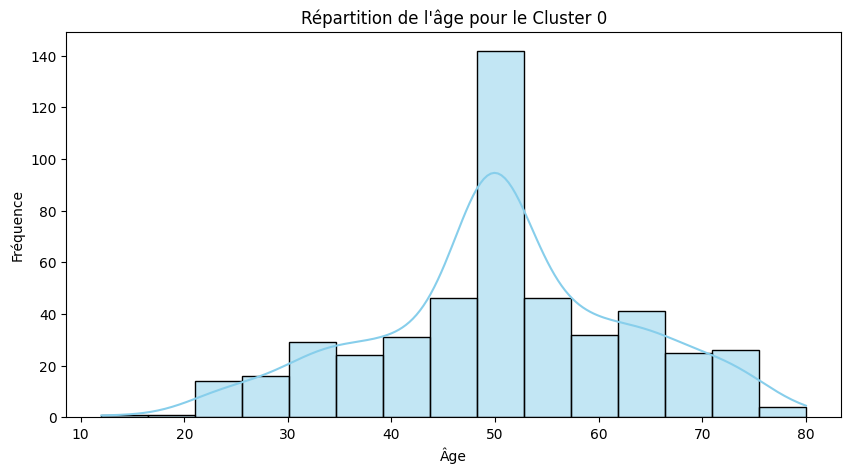

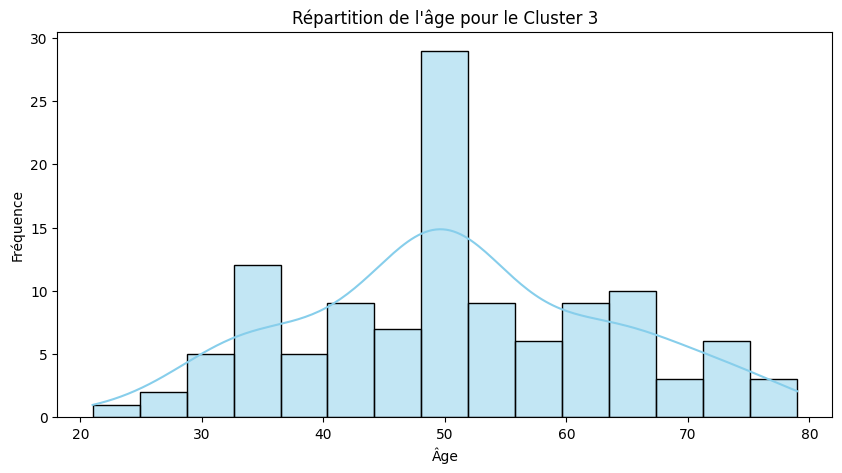

In [69]:
# Liste des clusters uniques
clusters = df['cluster'].unique()

# Générer un graphique de répartition de l'âge pour chaque cluster
for cluster in clusters:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['cluster'] == cluster]['author_age'], bins=15, kde=True, color='skyblue')
    plt.title(f"Répartition de l'âge pour le Cluster {cluster}")
    plt.xlabel("Âge")
    plt.ylabel("Fréquence")
    plt.show()